In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [147]:
PROBAS_DATA_PATH = '../reports/probas_sex.csv'
Y_DATA_PATH = '../data/raw/labeled_texts_fixed.csv'

In [148]:
probas_df = pd.read_csv(PROBAS_DATA_PATH)
y_df = pd.read_csv(Y_DATA_PATH)['sex']

In [149]:
probas_df, y_df

(             0         1
 0     0.999978  0.000022
 1     0.999988  0.000012
 2     0.999986  0.000014
 3     0.999985  0.000015
 4     0.999985  0.000016
 ...        ...       ...
 1901  0.999953  0.000047
 1902  0.999977  0.000023
 1903  0.999975  0.000025
 1904  0.999958  0.000042
 1905  0.999985  0.000015
 
 [1906 rows x 2 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9523    0
 9524    0
 9525    0
 9526    0
 9527    0
 Name: sex, Length: 9528, dtype: int64)

In [150]:
y_probas = np.array(probas_df)
y_train, y_test = train_test_split(y_df, test_size=0.2, random_state=42)
y_pred = np.argmax(y_probas, axis=1)

In [151]:
y_pred.shape

(1906,)

In [152]:
confusion_matrix(y_test, y_pred)

array([[1881,    8],
       [   3,   14]], dtype=int64)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.64      0.82      0.72        17

    accuracy                           0.99      1906
   macro avg       0.82      0.91      0.86      1906
weighted avg       1.00      0.99      0.99      1906



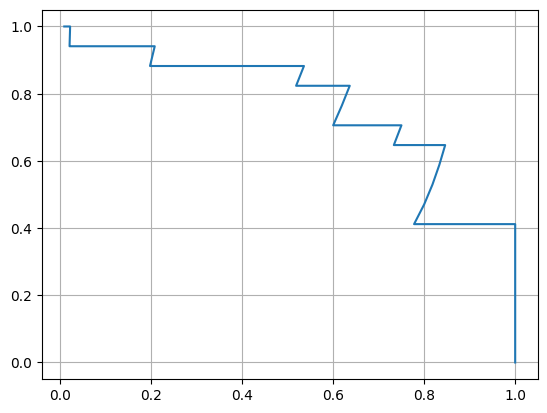

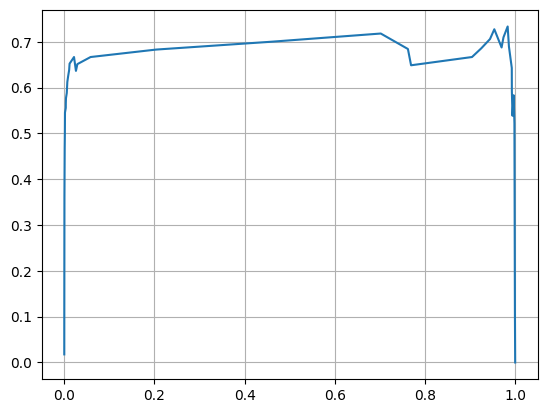

In [154]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probas[:, 1])
plt.figure()
plt.plot(precision, recall)
plt.grid()

plt.figure()
plt.plot(np.concatenate((thresholds_pr, np.array([1])), 0), 2 * recall * precision /(recall + precision))
plt.grid()

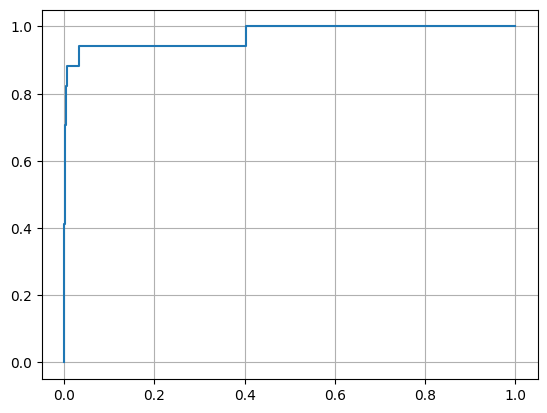

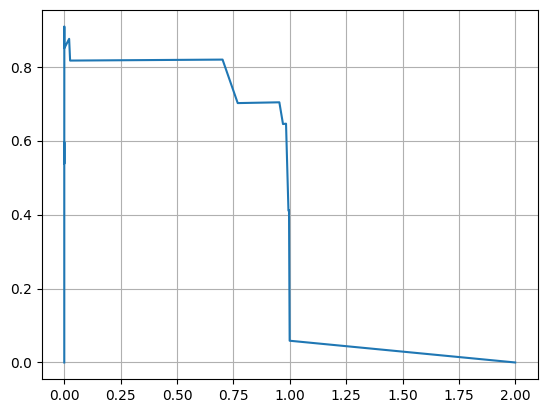

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_probas[:, 1])
plt.figure()
plt.plot(fpr, tpr)
plt.grid()

plt.figure()
plt.plot(thresholds, tpr - fpr)
plt.grid()

In [156]:
t0 = 0.5
t1 = thresholds[np.argmax(tpr - fpr)]
t2 = thresholds_pr[np.argmax(2 * recall * precision /(recall + precision))]
t1, t2

(0.0002468094, 0.9833347)

In [157]:
thresholds_pr[np.argmax(recall + precision)]

0.9833347

In [158]:
t0 = 0.5

In [159]:
y_pred = y_probas[:, 1] >= t0
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.64      0.82      0.72        17

    accuracy                           0.99      1906
   macro avg       0.82      0.91      0.86      1906
weighted avg       1.00      0.99      0.99      1906



In [160]:
y_pred = y_probas[:, 1] >= t1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1889
           1       0.21      0.94      0.34        17

    accuracy                           0.97      1906
   macro avg       0.60      0.95      0.66      1906
weighted avg       0.99      0.97      0.98      1906



In [161]:
y_pred = y_probas[:, 1] >= t2
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.85      0.65      0.73        17

    accuracy                           1.00      1906
   macro avg       0.92      0.82      0.87      1906
weighted avg       1.00      1.00      1.00      1906



In [92]:
precision[np.argmax(2 * recall * precision /(recall + precision))]

C:\Users\andre\AppData\Local\Temp\ipykernel_6712\744196289.py:1: RuntimeWarning: invalid value encountered in divide
  precision[np.argmax(2 * recall * precision /(recall + precision))]


0.0

KeyError: 'limit'